<a href="https://colab.research.google.com/github/ravi260372/Data_Science_Python/blob/main/Predicting_Heart_Disease_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**  
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

**Load Libraries**  

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
sns.set()

**Data Source**  
The dataset is publically available on the Kaggle website, and it is from an ongoing ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.  
https://raw.githubusercontent.com/dphi-official/Datasets/master/framingham.csv 

**Variables**  
Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

* Demographic:  
    sex: male or female;(Nominal)  
    age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)  

* Behavioural:  
    currentSmoker: whether or not the patient is a current smoker (Nominal)  
    cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)  

* Medical( history):  
    BPMeds: whether or not the patient was on blood pressure medication (Nominal)  
    prevalentStroke: whether or not the patient had previously had a stroke (Nominal)  
    prevalentHyp: whether or not the patient was hypertensive (Nominal)  
    diabetes: whether or not the patient had diabetes (Nominal)  

* Medical(current):
    totChol: total cholesterol level (Continuous)  
    sysBP: systolic blood pressure (Continuous)  
    diaBP: diastolic blood pressure (Continuous)  
    BMI: Body Mass Index (Continuous)  
    heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)  
    glucose: glucose level (Continuous)  

* Predict variable (desired target):
    10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)  

**Data Preparation**  

In [3]:
# load data  
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/framingham.csv'
heart_df= pd.read_csv(url)
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.sample(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2513,1,42,1,NaN,0.0,0,0,0,226.0,119.0,80.0,25.29,62.0,98.0,0
4218,0,52,0,0.0,0.0,0,0,0,265.0,137.5,84.5,26.91,72.0,86.0,0
1949,0,46,0,0.0,0.0,0,0,0,295.0,145.0,90.0,25.87,90.0,79.0,0
2793,1,47,1,20.0,0.0,0,1,0,286.0,148.0,98.0,29.98,80.0,93.0,1
3331,0,39,0,0.0,0.0,0,0,0,186.0,124.0,80.0,29.70,75.0,102.0,0


In [4]:
# variable types
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [5]:
# rename column 'male' to 'sex_male'
heart_df.rename(columns={'male':'Sex_male'},inplace=True)
heart_df.sample(5)

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3897,1,58,0,0.0,0.0,0,1,0,230.0,128.0,88.0,25.98,75.0,58.0,0
1803,0,55,0,0.0,1.0,0,1,0,285.0,158.0,98.0,30.23,70.0,88.0,0
751,0,63,0,0.0,0.0,0,0,0,207.0,127.0,75.0,22.26,70.0,77.0,0
1128,0,63,1,10.0,0.0,0,1,0,236.0,189.0,103.0,27.91,60.0,74.0,0
4214,0,56,1,5.0,0.0,0,0,0,230.0,123.0,78.5,24.71,76.0,87.0,1


**Unique Values and Missing Values**  

In [7]:
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(heart_df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = heart_df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = heart_df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(heart_df.isnull().sum()/len(heart_df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = heart_df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,UniqueVal,MissingVal,Percent Missing,Count
Sex_male,int64,2,0,0.00,4240
age,int64,39,0,0.00,4240
currentSmoker,int64,2,0,0.00,4240
cigsPerDay,float64,33,29,0.68,4211
BPMeds,float64,2,53,1.25,4187
prevalentStroke,int64,2,0,0.00,4240
prevalentHyp,int64,2,0,0.00,4240
diabetes,int64,2,0,0.00,4240
totChol,float64,248,50,1.18,4190
sysBP,float64,234,0,0.00,4240


In [11]:
# How Many Rows with at least 1 Missing Value
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('This represents',round((count/len(heart_df.index))*100), '% of rows with at least one missing value.')
print('We will drop the 489 rows with at least one missing values')

Total number of rows with missing values is  489
This represents 12 % of rows with at least one missing value.
We will drop the 489 rows with at least one missing values


In [13]:
# drop rows with missing values  
heart_df.dropna(axis=0,inplace=True)
# Tabular view of Data {shape of data, the type of data , the missing values , unique counts , % Missing}
# Creating the Data Dictionary with first column being datatype.
Data_dict = pd.DataFrame(heart_df.dtypes)
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.
Data_dict['UniqueVal'] = heart_df.nunique()
# Identifying the missing values from the dataset.
Data_dict['MissingVal'] = heart_df.isnull().sum()
# Percentage of Missing Values
Data_dict['Percent Missing'] = round(heart_df.isnull().sum()/len(heart_df)*100, 2)
# identifying count of the variable.
Data_dict['Count'] = heart_df.count()
# Renaming the first column using rename()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,UniqueVal,MissingVal,Percent Missing,Count
Sex_male,int64,2,0,0.0,3751
age,int64,39,0,0.0,3751
currentSmoker,int64,2,0,0.0,3751
cigsPerDay,float64,33,0,0.0,3751
BPMeds,float64,2,0,0.0,3751
prevalentStroke,int64,2,0,0.0,3751
prevalentHyp,int64,2,0,0.0,3751
diabetes,int64,2,0,0.0,3751
totChol,float64,242,0,0.0,3751
sysBP,float64,231,0,0.0,3751


**Exploratory Data Analysis : EDA**  

**Statistical Summaries**

In [17]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Feature Distributions**

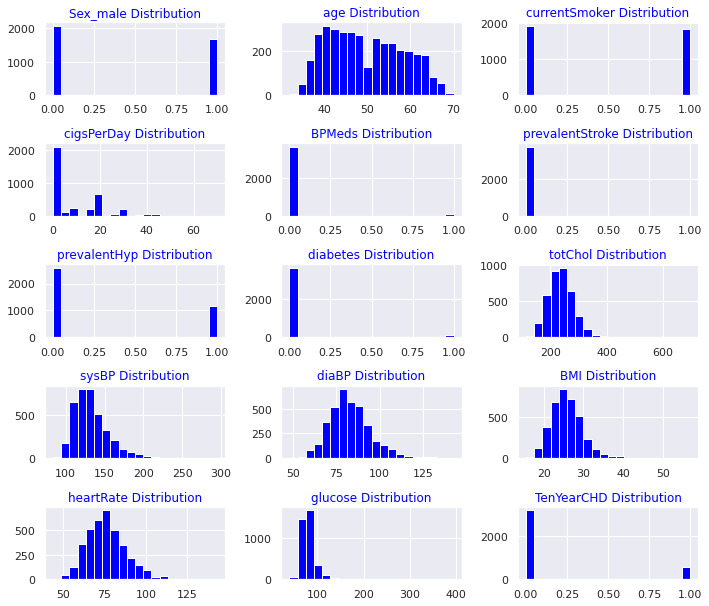

In [22]:
# function to plot histogram of continuous features
# inputs : dataframe , features i.e. column names , number of plots in rows and columns
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='blue')
        ax.set_title(feature+" Distribution",color='blue')
        
    fig.tight_layout(); 
    plt.show();
# call the function with dataframe , features , 6 rows and 3 columns
draw_histograms(heart_df,heart_df.columns,6,3)


1. Age and heartrate seem evenly distributed  
2. Glucose , Cholestrol , Systolic Blood Pressure and BMI are skwewed to the right  

**Target Distribution**

In [20]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

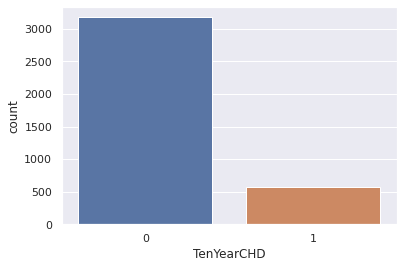

In [23]:
sns.countplot(x='TenYearCHD',data=heart_df);